# Problem Statement

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and have been asked to classify positive, negative, and neutral tweets.

Dataset has following features/variables


tweet_id
airline_sentiment
airline_sentiment_confidence
negativereason
negativereason_confidence
airline
airline_sentiment_gold
name
negativereason_gold
retweet_count
text
tweet_coord
tweet_created
tweet_location
user_timezone


In [1]:
import numpy as np 
import pandas as pd 
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Load the csv file available in the working or specified directory**

In [2]:
Airline_tweets = pd.read_csv("twitter-airline-sentiment.csv")

In [3]:
Airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24/02/15 11:35,NaN,Eastern Time (US & Canada)
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24/02/15 11:15,NaN,Pacific Time (US & Canada)
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24/02/15 11:15,Lets Play,Central Time (US & Canada)
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24/02/15 11:15,NaN,Pacific Time (US & Canada)
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24/02/15 11:14,NaN,Pacific Time (US & Canada)


In [4]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
## Let's get the count of Airline
print(Airline_tweets['airline'].nunique())
print(Airline_tweets['airline'].value_counts())

6
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


**So we have data belonging to 6 airlines**

In [6]:
Airline_tweets.shape
## 14640 rows and 15 variables

(14640, 15)

**Check for null values**

In [7]:
(Airline_tweets.isnull().sum() * 100 / Airline_tweets.index.size).round(2)

tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

**Columns with more than 90% missing values will be deleted**

In [8]:
print('Columns before: ', Airline_tweets.shape[1])
Airline_tweets.drop(['tweet_coord', 'airline_sentiment_gold','negativereason_gold'], axis = 1,inplace=True)
print('Columns after: ', Airline_tweets.shape[1])

Columns before:  15
Columns after:  12


**As the data set has data for 6 airlines, let's get a count of positive, negative and neutral for each airline**

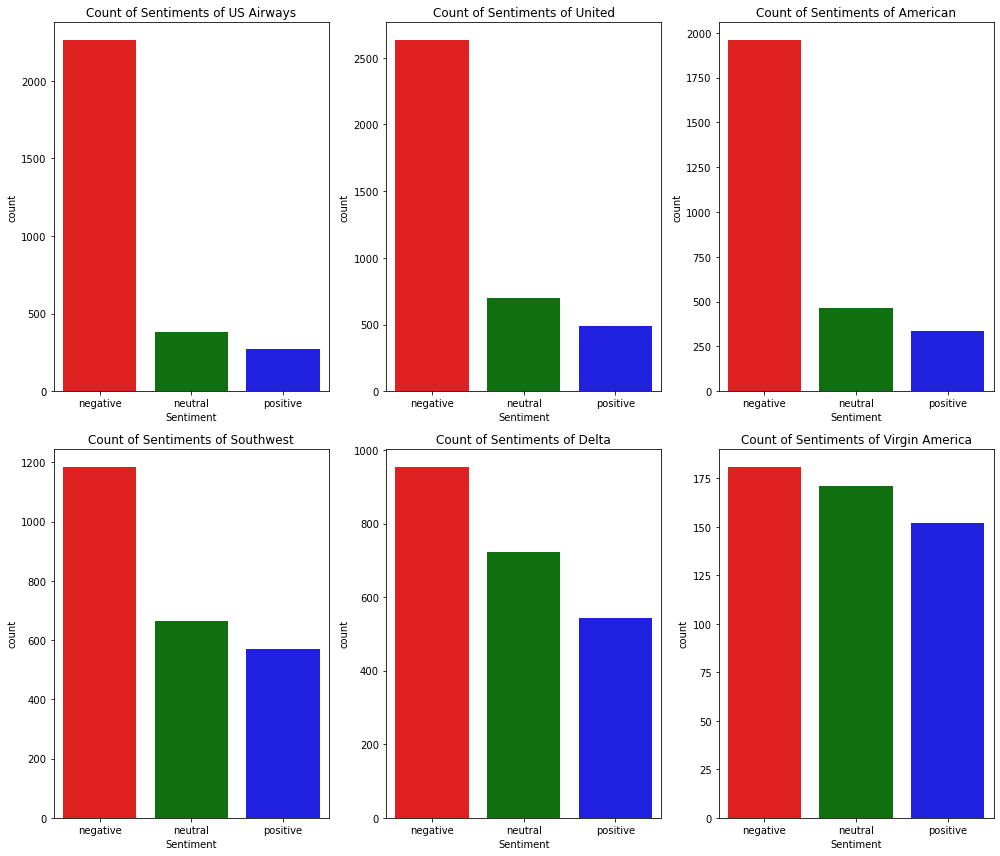

In [9]:
fig, ax = plt.subplots(figsize = (14, 12))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in range(6):
    plt.subplot(2, 3, i+1)
    sns.countplot(Airline_tweets[Airline_tweets['airline'] == airlines[i]].airline_sentiment, order = ['negative', 'neutral', 'positive'], palette = ['red','green', 'blue'])
    plt.title('Count of Sentiments of '+airlines[i])  
    plt.xlabel("Sentiment")
    plt.tight_layout() 

In [10]:
ct = pd.crosstab(Airline_tweets['airline'], Airline_tweets['airline_sentiment'])
ct

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


In [11]:
ct_norm = round(pd.crosstab(Airline_tweets['airline'], Airline_tweets['airline_sentiment'], normalize = 'index')*100, 2)
ct_norm

airline_sentiment,negative,neutral,positive
airline,,,
American,71.04,16.78,12.18
Delta,42.98,32.54,24.48
Southwest,49.01,27.44,23.55
US Airways,77.69,13.08,9.23
United,68.89,18.24,12.87
Virgin America,35.91,33.93,30.16


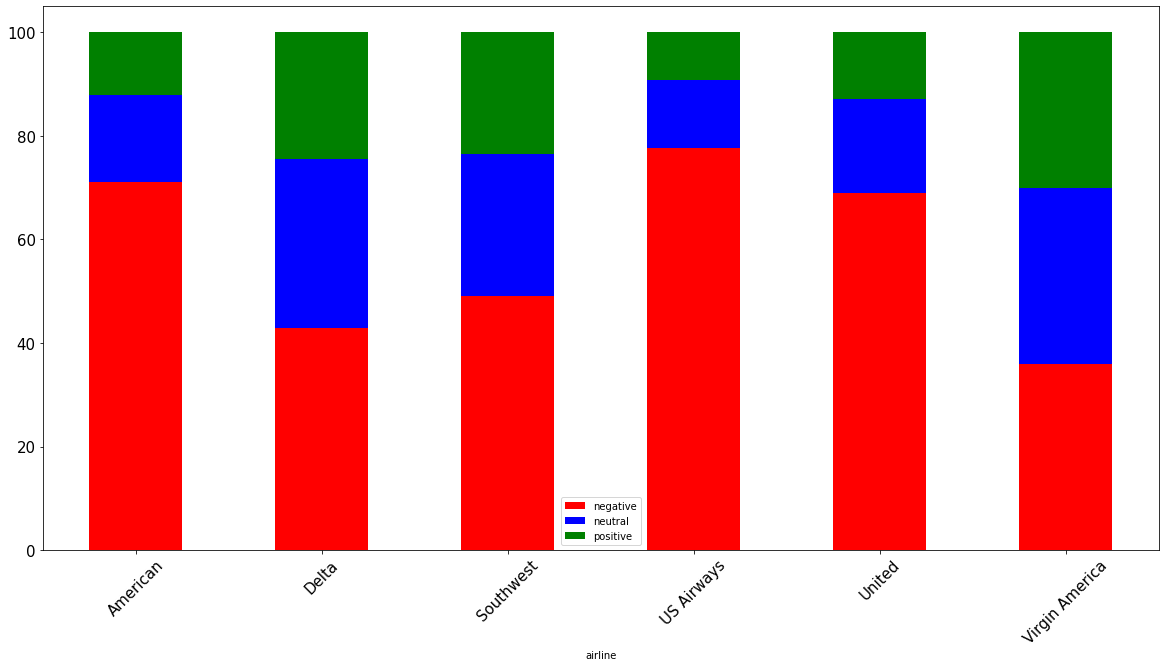

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
ct_norm.plot.bar(stacked = True, color = {'negative': 'red', 'positive': 'green', 'neutral':'blue'})
plt.legend(loc = 'best')
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15);

1. **US Airways have a least positive sentiment followed by American and United.**
2. **Virgin America has most balanced sentiments**


In [13]:
#conda install -c conda-forge wordcloud

**Let's get an idea of most frequently used words in negative tweets:**

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [15]:
new_df=Airline_tweets[Airline_tweets['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
len(words.split())

180680

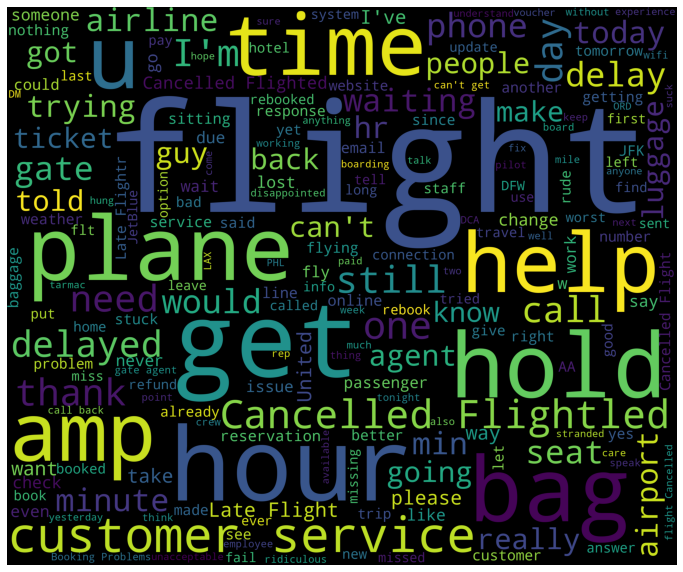

In [16]:
from wordcloud import WordCloud,STOPWORDS
new_df=Airline_tweets[Airline_tweets['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
            
                            ])
wordcloud = WordCloud(stopwords=stop,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


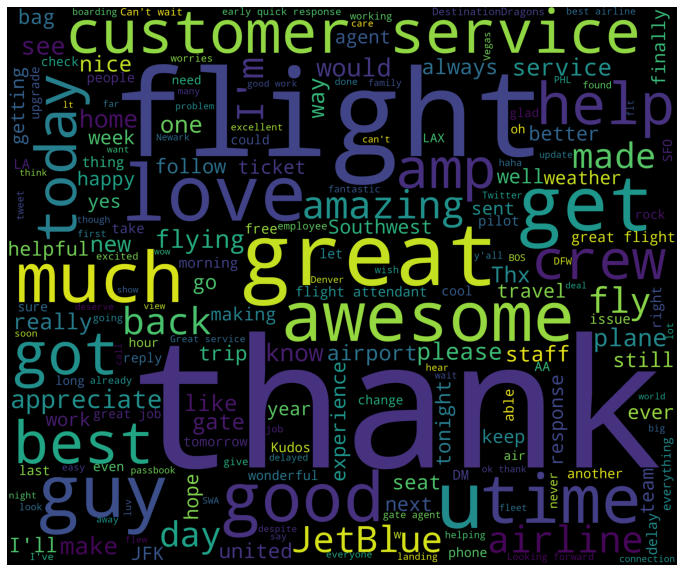

In [17]:
#from wordcloud import WordCloud,STOPWORDS
new_df=Airline_tweets[Airline_tweets['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
            
                            ])
wordcloud = WordCloud(stopwords=stop,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()



1. **In the above word cloud there are certain words probably will not make too much sense to study the reason for negative sentiment and subsequently based on the frequency of these words we will decide if the same needs to be deleted**
2. **Lets understand the reason for negativity for each airline:**

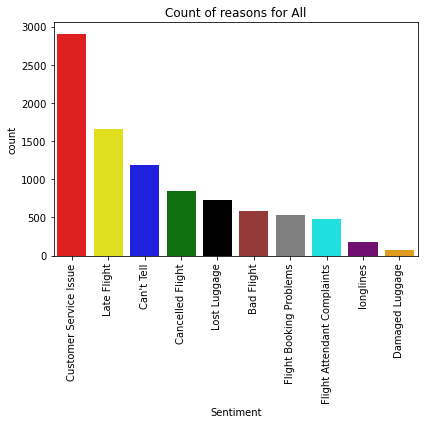

In [18]:
plt.figure(figsize=(6, 6))
sns.countplot(Airline_tweets.negativereason, order = Airline_tweets.negativereason.value_counts().index, palette = ['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
plt.title('Count of reasons for All')   
plt.xlabel("Sentiment")
plt.xticks(rotation = 90)
plt.tight_layout()

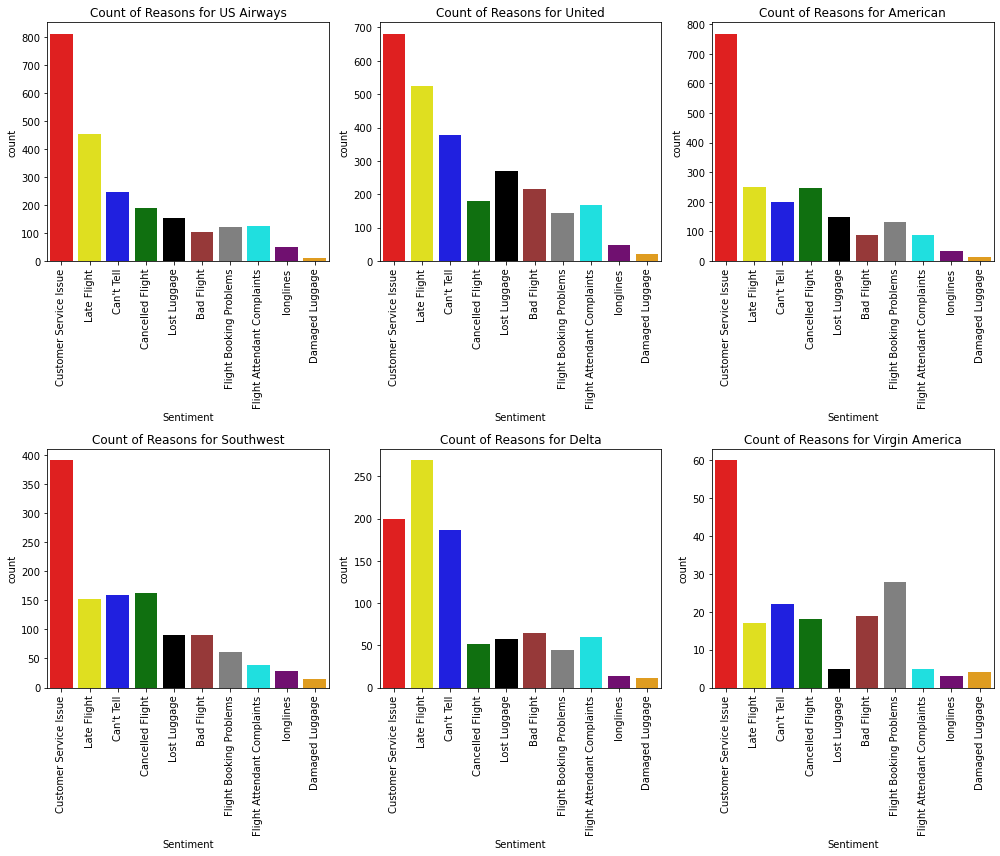

In [19]:
fig, ax = plt.subplots(figsize = (14, 12))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in range(6):
    plt.subplot(2, 3, i+1)
    sns.countplot(Airline_tweets[Airline_tweets['airline'] == airlines[i]].negativereason, order = Airline_tweets.negativereason.value_counts().index, palette = ['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.title('Count of Reasons for ' +airlines[i])   
    plt.xlabel("Sentiment")
    plt.xticks(rotation = 90)
    plt.tight_layout()

1. **Customer Service Issue is the main negative reason for US Airways,United,American,Southwest,Virgin America**
2. **Late Flight is the main negative reason for Delta.**
3. **Interestingly, Virgin America has the least count of negative reasons (all less than 60)**
4. **Contrastingly to Virgin America, airlines like US Airways,United,American have more than 500 negative reasons (Late flight, Customer Service Issue)**

Readers are advised to perform the similar analysis for Positive and Neutral tweets as well.

## Basic Pre-Processing

**Lower Case conversion:**

In [20]:
Airline_tweets['Tweet'] = Airline_tweets['text'].str.lower()
Airline_tweets['Tweet'].head()

0                  @virginamerica what @dhepburn said.
1    @virginamerica plus you've added commercials t...
2    @virginamerica i didn't today... must mean i n...
3    @virginamerica it's really aggressive to blast...
4    @virginamerica and it's a really big bad thing...
Name: Tweet, dtype: object

**Removal of StopWords**

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Airline_tweets['stop_words'] = Airline_tweets['Tweet'].apply(lambda x: [word for word in x.split() if word in stop])
Airline_tweets['stop_words'].head()

0                              [what]
1                   [you've, to, the]
2                  [i, didn't, i, to]
3    [it's, to, in, your, they, have]
4           [and, it's, a, about, it]
Name: stop_words, dtype: object

In [22]:
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))
Airline_tweets['Tweet'].head()

0                       @virginamerica @dhepburn said.
1    @virginamerica plus added commercials experien...
2    @virginamerica today... must mean need take an...
3    @virginamerica really aggressive blast obnoxio...
4                  @virginamerica really big bad thing
Name: Tweet, dtype: object

**Removal of Punctuation:**

In [23]:
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].str.replace('[^a-z\s]','') 
#Replace any character that is not a word character or a space character with nothing.
Airline_tweets['Tweet'].head() #[^a-zA-Z\s]

0                          virginamerica dhepburn said
1    virginamerica plus added commercials experienc...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

In [24]:
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x: " ".join(word for word in x.split() if 'http' not in word))
Airline_tweets['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercials experienc...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

**Common Words Removal**
1. **We will create a list of 10 frequently occurring words and then decide if we need to remove it or retain it**
2. **Reason is that this file has tweets related to flights.. So no point in keeping the words like name, unless we have tweets related to different category**
3. **Name of the specific airline is not removed as we would require the name of the airline for bigram analysis**

In [25]:
freq = pd.Series(' '.join(Airline_tweets['Tweet']).split()).value_counts()[:30]
freq

united           4144
flight           3895
usairways        3051
americanair      2957
southwestair     2453
jetblue          2361
get              1336
thanks           1072
cancelled        1056
service           956
help              855
time              770
im                764
customer          746
us                706
hours             678
flights           646
amp               641
hold              638
plane             620
thank             602
cant              579
still             569
please            560
one               558
need              553
would             548
delayed           529
virginamerica     521
back              518
dtype: int64

**Please note that we are removing the digit 2 here. This 2 might mean "to" in English. However as advanced library package of NLP are not used, this would get treated as a digit and hence we are removing the same:**

In [26]:
freq =['flight','2','aa']

In [27]:
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x: " ".join(word for word in x.split() if word not in freq))
Airline_tweets['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercials experienc...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

**Rare Words Removal**
**>This is done as association of these less occurring words with the existing words could be a noise**
> **As it is difficult to make out if these words will have association in text analytics or not, hence to start with these words are kept in the dataset**

In [28]:
freq = pd.Series(' '.join(Airline_tweets['Tweet']).split()).value_counts()[-30:]
freq

budweiserduels        1
probablynot           1
circles               1
flightleddelayed      1
geekandahalf          1
highbuddyyy           1
pressurecooker        1
rylietolbert          1
predict               1
deliberate            1
louder                1
triedits              1
pvdiad                1
reservationexplain    1
ranging               1
sided                 1
notion                1
commend               1
jayfranceschi         1
conversational        1
juliasinton           1
thatlol               1
conv                  1
virtually             1
warrants              1
recover               1
freecomedyshow        1
un                    1
evedidnt              1
sharp                 1
dtype: int64

**Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach**

In [29]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Airline_tweets['Tweet_stem'] = Airline_tweets['Tweet'].apply(lambda x: " ".join(st.stem(word) for word in x.split()))
Airline_tweets['Tweet_stem'].head()

0                          virginamerica dhepburn said
1           virginamerica plu ad commerci experi tacki
2    virginamerica today must mean need take anoth ...
3    virginamerica realli aggress blast obnoxi ente...
4                   virginamerica realli big bad thing
Name: Tweet_stem, dtype: object

In [30]:
from nltk.stem import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
Airline_tweets['Tweet'] = Airline_tweets['Tweet'].apply(lambda x: " ".join(lmtzr.lemmatize(x) for x in x.split()))
Airline_tweets['Tweet'].head()

0                          virginamerica dhepburn said
1    virginamerica plus added commercial experience...
2    virginamerica today must mean need take anothe...
3    virginamerica really aggressive blast obnoxiou...
4                   virginamerica really big bad thing
Name: Tweet, dtype: object

**Let's look at the overall distribution of positive, negative and neutral sentiments**

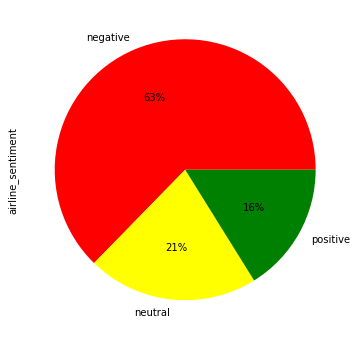

In [31]:
plt.figure(figsize=(6, 6))
Airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red","yellow","green"]);

In [32]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  Tweet                         14640 non-null  object 
 13  s

In [33]:
processed_features = Airline_tweets.iloc[:, 12].values
labels = Airline_tweets.iloc[:, 1].values

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df = 100, max_df = 1000)#(min_df = 0.2,max_df = 0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [35]:
vectorizer

TfidfVectorizer(max_df=1000, max_features=2500, min_df=100)

In [36]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
pd.DataFrame(processed_features, columns = vectorizer.get_feature_names())

,able,again,agent,ago,air,airline,airport,already,also,always,...,without,work,working,worst,would,year,yes,yesterday,yet,you
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14636,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14637,0.0,0.0,0.0,0.0,0.0,0.706803,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14638,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [39]:
y_train

array(['positive', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [40]:
X_train.shape

(11712, 238)

## Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9280225409836066
[[7005  284   19]
 [ 161 2287   37]
 [  90  252 1577]]
              precision    recall  f1-score   support

    negative       0.97      0.96      0.96      7308
     neutral       0.81      0.92      0.86      2485
    positive       0.97      0.82      0.89      1919

    accuracy                           0.93     11712
   macro avg       0.91      0.90      0.90     11712
weighted avg       0.93      0.93      0.93     11712



In [43]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.649931693989071
[[1438  305  127]
 [ 269  284   61]
 [ 167   96  181]]
              precision    recall  f1-score   support

    negative       0.77      0.77      0.77      1870
     neutral       0.41      0.46      0.44       614
    positive       0.49      0.41      0.45       444

    accuracy                           0.65      2928
   macro avg       0.56      0.55      0.55      2928
weighted avg       0.65      0.65      0.65      2928



## Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=200, random_state=0)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [45]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9280225409836066
[[6954  320   34]
 [ 122 2313   50]
 [  68  249 1602]]
              precision    recall  f1-score   support

    negative       0.97      0.95      0.96      7308
     neutral       0.80      0.93      0.86      2485
    positive       0.95      0.83      0.89      1919

    accuracy                           0.93     11712
   macro avg       0.91      0.91      0.90     11712
weighted avg       0.93      0.93      0.93     11712



In [46]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7165300546448088
[[1623  187   60]
 [ 280  286   48]
 [ 172   83  189]]
              precision    recall  f1-score   support

    negative       0.78      0.87      0.82      1870
     neutral       0.51      0.47      0.49       614
    positive       0.64      0.43      0.51       444

    accuracy                           0.72      2928
   macro avg       0.64      0.59      0.61      2928
weighted avg       0.70      0.72      0.71      2928



## Discriminant Analysis

In [47]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [48]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7336065573770492
[[6474  609  225]
 [1103 1216  166]
 [ 642  375  902]]
              precision    recall  f1-score   support

    negative       0.79      0.89      0.83      7308
     neutral       0.55      0.49      0.52      2485
    positive       0.70      0.47      0.56      1919

    accuracy                           0.73     11712
   macro avg       0.68      0.62      0.64     11712
weighted avg       0.72      0.73      0.72     11712



In [49]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7240437158469946
[[1646  165   59]
 [ 300  271   43]
 [ 162   79  203]]
              precision    recall  f1-score   support

    negative       0.78      0.88      0.83      1870
     neutral       0.53      0.44      0.48       614
    positive       0.67      0.46      0.54       444

    accuracy                           0.72      2928
   macro avg       0.66      0.59      0.62      2928
weighted avg       0.71      0.72      0.71      2928



**Out of the 3 models given above, considering the different between train and test dataset performance parameters, LDA has performed the best.**

## Let's Recreate model with only 2 classes where positive and neutral tweets are merged and treated as non-negative


In [50]:
def Tweet(x):
    if x == "positive":
        return "Non-Negative"
    elif x == 'neutral':
        return "Non-Negative"
    else: return "Negative"


In [51]:
Airline_tweets["M-Sentiment"] = Airline_tweets["airline_sentiment"].apply(Tweet)

Airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,Tweet,stop_words,Tweet_stem,M-Sentiment
0,5.700000e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,24/02/15 11:35,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,[what],virginamerica dhepburn said,Non-Negative
1,5.700000e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,24/02/15 11:15,NaN,Pacific Time (US & Canada),virginamerica plus added commercial experience...,"[you've, to, the]",virginamerica plu ad commerci experi tacki,Non-Negative
2,5.700000e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,24/02/15 11:15,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anothe...,"[i, didn't, i, to]",virginamerica today must mean need take anoth ...,Non-Negative
3,5.700000e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,24/02/15 11:15,NaN,Pacific Time (US & Canada),virginamerica really aggressive blast obnoxiou...,"[it's, to, in, your, they, have]",virginamerica realli aggress blast obnoxi ente...,Negative
4,5.700000e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,24/02/15 11:14,NaN,Pacific Time (US & Canada),virginamerica really big bad thing,"[and, it's, a, about, it]",virginamerica realli big bad thing,Negative


**Recheck the levels of the newly created field**

In [52]:
Airline_tweets["M-Sentiment"].value_counts()

Negative        9178
Non-Negative    5462
Name: M-Sentiment, dtype: int64

In [53]:
Airline_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   name                          14640 non-null  object 
 7   retweet_count                 14640 non-null  int64  
 8   text                          14640 non-null  object 
 9   tweet_created                 14640 non-null  object 
 10  tweet_location                9907 non-null   object 
 11  user_timezone                 9820 non-null   object 
 12  Tweet                         14640 non-null  object 
 13  s

In [54]:
processed_features = Airline_tweets.iloc[:, 12].values
labels = Airline_tweets.iloc[:, 15].values

In [55]:
processed_features

array(['virginamerica dhepburn said',
       'virginamerica plus added commercial experience tacky',
       'virginamerica today must mean need take another trip', ...,
       'americanair please bring american airline blackberry',
       'americanair money change answer phone suggestion make commitment',
       'americanair ppl need know many seat next plz put u standby people next'],
      dtype=object)

In [56]:
labels

array(['Non-Negative', 'Non-Negative', 'Non-Negative', ...,
       'Non-Negative', 'Negative', 'Non-Negative'], dtype=object)

In [57]:
vectorizer = TfidfVectorizer (max_features=2500, min_df = 100, max_df = 1000)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

## Decision Tree with Binary classification

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [9],#[3,5,7,9],
    'min_samples_leaf': [50],#[50,100, 150],
    'min_samples_split': [450],#[150,300,450],
}

dtcl = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 3)

In [61]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 9, 'min_samples_leaf': 50, 'min_samples_split': 450}

In [62]:
best_grid = grid_search.best_estimator_

In [63]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score = best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.6821209016393442
[[7143  165]
 [3558  846]]
              precision    recall  f1-score   support

    Negative       0.67      0.98      0.79      7308
Non-Negative       0.84      0.19      0.31      4404

    accuracy                           0.68     11712
   macro avg       0.75      0.58      0.55     11712
weighted avg       0.73      0.68      0.61     11712



In [64]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6871584699453552
[[1817   53]
 [ 863  195]]
              precision    recall  f1-score   support

    Negative       0.68      0.97      0.80      1870
Non-Negative       0.79      0.18      0.30      1058

    accuracy                           0.69      2928
   macro avg       0.73      0.58      0.55      2928
weighted avg       0.72      0.69      0.62      2928



## Random Forest Model as Binary Classifier

**Grid Search for finding the optimal number of parameters:**

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [9],#[3,5,7,9]
    'min_samples_leaf': [50], #[50,100, 150]
    'min_samples_split': [300], #[150,300,450]
    'n_estimators': [25] #[25, 50, 100]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [66]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [9], 'min_samples_leaf': [50],
                         'min_samples_split': [300], 'n_estimators': [25]})

In [68]:
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 50,
 'min_samples_split': 300,
 'n_estimators': 25}

In [69]:
best_grid = grid_search.best_estimator_

In [70]:
best_grid

RandomForestClassifier(max_depth=9, min_samples_leaf=50, min_samples_split=300,
                       n_estimators=25)

In [71]:
## Performance Matrix on train data set
y_train_predict = best_grid.predict(X_train)
model_score =best_grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.6846823770491803
[[7143  165]
 [3528  876]]
              precision    recall  f1-score   support

    Negative       0.67      0.98      0.79      7308
Non-Negative       0.84      0.20      0.32      4404

    accuracy                           0.68     11712
   macro avg       0.76      0.59      0.56     11712
weighted avg       0.73      0.68      0.62     11712



In [72]:
## Performance Matrix on test data set
y_test_predict = best_grid.predict(X_test)
model_score = best_grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.6847677595628415
[[1820   50]
 [ 873  185]]
              precision    recall  f1-score   support

    Negative       0.68      0.97      0.80      1870
Non-Negative       0.79      0.17      0.29      1058

    accuracy                           0.68      2928
   macro avg       0.73      0.57      0.54      2928
weighted avg       0.72      0.68      0.61      2928



**Random Forest results were better than the output from decision tree on the test data set**

## Discriminant Analysis with Binary Classifier

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [74]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7850068306010929
[[6299 1009]
 [1509 2895]]
              precision    recall  f1-score   support

    Negative       0.81      0.86      0.83      7308
Non-Negative       0.74      0.66      0.70      4404

    accuracy                           0.79     11712
   macro avg       0.77      0.76      0.77     11712
weighted avg       0.78      0.79      0.78     11712



In [75]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7704918032786885
[[1600  270]
 [ 402  656]]
              precision    recall  f1-score   support

    Negative       0.80      0.86      0.83      1870
Non-Negative       0.71      0.62      0.66      1058

    accuracy                           0.77      2928
   macro avg       0.75      0.74      0.74      2928
weighted avg       0.77      0.77      0.77      2928



1. **Linear Discriminant model has performed the best even without any hyperparameter tuning for both the classes**
2. **Test and Train performance is within the accepted limited of +/- 10%**

## Conclusion

Out of the 3 models given above, considering the difference between train and test dataset performance parameters, LDA has performed the best.(for both 3 classes and binary classification)

In terms of sentiments, based on the organisation objective, either positive, negative or neutral metrics could be analysed to define the marketing strategy e.g. based on negative sentiments key words organisation can decide on what they should concertrate for improvement.


**One important observation**

> **Its not necessary that parameter tuning will always result in a better model. As we have observed in Random Forest when Grid Search was used there was no improvement in the recall value of both the classes and in case of Decision Tree, recall for non-negative has gone down, post regularization.**